# 1. Import the data

In [2]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import scipy.stats

from csv import writer
from functools import reduce

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

pd.set_option('display.max_colwidth', -1)
%matplotlib notebook
%matplotlib inline

In [2]:
#function to plot count
def plot_count(label,df):
    sns.set(style='darkgrid')
    sns.countplot(x = str(label),data = df,
              order = df[label].value_counts().index,palette="rocket")
    plt.title('Distribution of Classes')
    plt.show()

In [152]:
spam_ads = pd.read_csv( '/Users/cristiana/Desktop/Insight_project/Spam_Ads_1237_withtextandtitle_020219.csv',encoding='utf-8')
ads_nice = pd.read_csv( '/Users/cristiana/Desktop/Insight_project/RealSexAds_1698_withtextandtitle_020319.csv',encoding='utf-8')

In [153]:
ads_nice2 = pd.read_csv( '/Users/cristiana/Desktop/Insight_project/first_500_Phone_number_matching_url_positive_2_new_Feb3batch6_full.csv',encoding='utf-8')
spam_ads2 = pd.read_csv( '/Users/cristiana/Desktop/Insight_project/first_500_Phone_number_matching_url_positive_2_new_Feb3batch6_Scam_xbj_full.csv',encoding='utf-8')

In [154]:
spam_ads3 = pd.read_csv( '/Users/cristiana/Desktop/Insight_project/xbb_unique_morescam.csv',encoding='utf-8')
spam_ads4 = pd.read_csv( '/Users/cristiana/Desktop/Insight_project/xbb_unique_half.csv',encoding='utf-8')
spam_ads5 = pd.read_csv( '/Users/cristiana/Desktop/Insight_project/second_500_Phone_number_matching_url_Spam_1_new_Feb16.csv',encoding='utf-8')

In [155]:
print(spam_ads.shape, spam_ads2.shape, spam_ads3.shape,spam_ads4.shape, ads_nice.shape, ads_nice2.shape)

(1236, 3) (400, 3) (204, 3) (124, 3) (1698, 3) (497, 3)


In [156]:
spam_ads2 = spam_ads.append(spam_ads2)
ads_nice = ads_nice.append(ads_nice2)

In [157]:
spam_ads2 = spam_ads2.append(spam_ads3)

In [158]:
spam_ads2 = spam_ads2.append(spam_ads4)

In [159]:
spam_ads2 = spam_ads2.append(spam_ads5)

In [160]:
ads_nice.shape

(2195, 3)

In [161]:
spam_ads2.shape

(2464, 3)

In [164]:
spam_ads2 = spam_ads2.dropna()
spam_ads2 = spam_ads2.drop_duplicates(subset=['Text'])#'Title','Text',

In [165]:
spam_ads2.shape

(677, 3)

In [166]:
ads_nice.shape

(2195, 3)

In [167]:
ads_nice = ads_nice.dropna()
ads_nice = ads_nice.drop_duplicates(subset=['Text'])#'Text',

In [168]:
ads_nice.shape

(1210, 3)

# 2. Some Information about the data

## 2.1 Data description

In [19]:
ads_nice.describe()

,URL,Text,Title
count,1177,1177,1177
unique,1177,1177,1177
top,https://www.cityxguide.com/escorts/extremley-addictive-beauty-bombshell-lets-have-some-real-fun-717970017-14833268,"[""\n Exotic and ready for you. Let my skills take you away ;) I'm horneyy & ready to play dadddy \n727 221 1477\n""]",['🎐🏡💚💮Doggie Style & New Style 💘Without Condom💘💕First Time Sex🌹 ☎Contact me:443.582.4151 | United States Escorts | Florida Escorts | Okaloosa Escorts | cityxguide.com']
freq,1,1,1


In [20]:
spam_ads2.describe()

,URL,Text,Title
count,676,676,676
unique,675,676,676
top,https://www.cityxguide.com/escorts/come-play-with-me1546471854-15348200,"['\n', ""<p>Hi guys! It's Princess! \xa0For you that are stressed out and need the best massage in the south or you that have a fantasy that you want to make a reality…!<br/>\nDon't hesitate because it could be too late! Serious callers only! I am straight up and I don't play games so if that is what you want then don't call me because I like what I do and I enjoy myself and I know you will.Text me; (479) 437-9280</p>"", '\n']",['đ\x9f\x92\x9câ\x80żâ\x9ešâ\x81\x80đ\x9f\x8cšđ\x9f\x8cšđ\x9f\x8cşđ\x9f\x8cžâ\x9e\x95â\x9c\x94ď¸\x8fâ\x9c\x94ď¸\x8fâ\x9e\x95 cuddle buddyđ\x9f\x92\x9câ\x80żâ\x9ešâ\x81\x80đ\x9f\x8cšđ\x9f\x8cšđ\x9f\x8cşđ\x9f\x8cžâ\x9e\x95â\x9c\x94ď¸\x8fâ\x9c\x94ď¸\x8fâ\x9e\x95 | United States Escorts | North Dakota Escorts | Grand Forks Escorts | cityxguide.com']
freq,2,1,1


## 2.2 Words count

In [21]:
ads_nice['word_count'] = ads_nice['Text'].apply(lambda x: len(str(x).split(" ")))
spam_ads2['word_count'] = spam_ads2['Text'].apply(lambda x: len(str(x).split(" ")))

## 2.3 Number of character

In [22]:
ads_nice['char_count'] = ads_nice['Text'].str.len() 
spam_ads2['char_count'] = spam_ads2['Text'].str.len()

## 2.4 Average words length

In [23]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

ads_nice['avg_word'] = ads_nice['Text'].apply(lambda x: avg_word(x))
spam_ads2['avg_word'] = spam_ads2['Text'].apply(lambda x: avg_word(str(x)))

## 2.6 Number of Upper case

In [24]:
ads_nice['upper'] = ads_nice['Text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
spam_ads2['upper'] = spam_ads2['Text'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))

## 2.7 Number of special characters

In [25]:
ads_nice['questionmark'] = ads_nice['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('?')]))
spam_ads2['questionmark'] = spam_ads2['Text'].apply(lambda x: len([x for x in str(x).split() if x.startswith('?')]))

In [42]:
import string

ads_nice['Punctuation'] = ads_nice['Text'].apply(lambda x: len([x for x in x.split() if x in string.punctuation]))
spam_ads2['Punctuation'] = spam_ads2['Text'].apply(lambda x: len([x for x in str(x).split() if x in string.punctuation]))


In [26]:
ads_nice['dash'] = ads_nice['Text'].apply(lambda x: len([x for x in x.split() if '-' in x]))
spam_ads2['dash'] = spam_ads2['Text'].apply(lambda x: len([x for x in str(x).split() if '-' in x]))

## 2.8 Number of mistakes

In [27]:
from nltk.corpus import wordnet
ads_nice['Nmistakes'] = ads_nice['Text'].apply(lambda x: len([x for x in x.split() if not wordnet.synsets(x) ]))
spam_ads2['Nmistakes'] = spam_ads2['Text'].apply(lambda x: len([x for x in str(x).split() if not wordnet.synsets(x) ]))

## 2.9 Number of stopwords

In [28]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

ads_nice['stopwords'] = ads_nice['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
spam_ads2['stopwords'] = spam_ads2['Text'].apply(lambda x: len([x for x in str(x).split() if x in stop]))

## 2.10 Number of emojii


In [29]:
import emoji
emoji_re = re.compile('[\\u203C-\\u3299\\U0001F000-\\U0001F644]',re.IGNORECASE)

ads_nice['Emojii'] = ads_nice['Text'].apply(lambda x: len([emoji_re.findall(x) for x in x.split() ]))
spam_ads2['Emojii'] = spam_ads2['Text'].apply(lambda x: len([emoji_re.findall(x) for x in str(x).split() ]))

## 2.11 Number of words that start with capital

In [30]:
ads_nice['NumOfCapital'] = ads_nice['Text'].apply(lambda x: len([x for x in str(x).split() if x.istitle()==True]))
spam_ads2['NumOfCapital'] = spam_ads2['Text'].apply(lambda x: len([x for x in str(x).split() if x.istitle()==True]))


## 2.11 Other unicode character (Voiced dental fricative)

In [31]:
unicode_re = re.compile('[\xF0\x9F\x98\xA2]',re.IGNORECASE)
ads_nice['unicode_re'] = ads_nice['Text'].apply(lambda x: len([unicode_re.findall(x) for x in x.split() ]))
spam_ads2['unicode_re'] = spam_ads2['Text'].apply(lambda x: len([unicode_re.findall(x) for x in str(x).split() ]))

In [32]:
unicode_jap = re.compile('[\u00F0\u00F5\u00A5]',re.IGNORECASE)
ads_nice['unicode_japanese'] = ads_nice['Text'].apply(lambda x: len([unicode_jap.findall(x) for x in x.split() ]))
spam_ads2['unicode_japanese'] = spam_ads2['Text'].apply(lambda x: len([unicode_jap.findall(x) for x in str(x).split() ]))

In [33]:
from nltk import word_tokenize, pos_tag
ads_nice['N_noun'] = ads_nice['Text'].apply(lambda x:  sum(1 for word, pos in pos_tag(word_tokenize(x)) if pos.startswith('NN'))/len(str(x).split(" ")) )
spam_ads2['N_noun']= spam_ads2['Text'].apply(lambda x: sum(1 for word, pos in pos_tag(word_tokenize(x)) if pos.startswith('NN'))/len(str(x).split(" ")) )

In [34]:
ads_nice['N_adj'] = ads_nice['Text'].apply(lambda x: sum(1 for word, pos in pos_tag(word_tokenize(x)) if pos.startswith('JJ'))/len(str(x).split(" ") ))
spam_ads2['N_adj']= spam_ads2['Text'].apply(lambda x:sum(1 for word, pos in pos_tag(word_tokenize(x)) if pos.startswith('JJ'))/len(str(x).split(" ") ))

In [35]:
ads_nice['N_verb'] = ads_nice['Text'].apply(lambda x: sum(1 for word, pos in pos_tag(word_tokenize(x)) if pos.startswith('VB'))/len(str(x).split(" ") ))
spam_ads2['N_verb'] = spam_ads2['Text'].apply(lambda x:sum(1 for word, pos in pos_tag(word_tokenize(x)) if pos.startswith('VB'))/len(str(x).split(" ") ))

In [36]:
ads_nice['N_foreign'] = ads_nice['Text'].apply(lambda x: sum(1 for word, pos in pos_tag(word_tokenize(x)) if pos.startswith('FW'))/len(str(x).split(" ") ))
spam_ads2['N_foreign'] = spam_ads2['Text'].apply(lambda x:sum(1 for word, pos in pos_tag(word_tokenize(x)) if pos.startswith('FW'))/len(str(x).split(" ") ))

In [37]:
ads_nice.to_pickle('/Users/cristiana/Desktop/Insight_project/Total_labelPositive_adsTEXT_counts_feb11.pkl')
ads_nice.to_csv('/Users/cristiana/Desktop/Insight_project/Total_unlabelPositive_adsTEXT_counts_feb11.csv')

In [38]:
spam_ads2.to_pickle('/Users/cristiana/Desktop/Insight_project/Total_labelSPAM_adsTEXT_counts_feb11.pkl')
spam_ads2.to_csv('/Users/cristiana/Desktop/Insight_project/Total_labelSPAM_adsTEXT_counts_feb11.csv')

In [39]:
spam_ads2 = pd.read_pickle('/Users/cristiana/Desktop/Insight_project/Total_labelSPAM_adsTEXT_counts_feb11.pkl')
ads_nice  = pd.read_pickle('/Users/cristiana/Desktop/Insight_project/Total_labelPositive_adsTEXT_counts_feb11.pkl')

## 2.12 Plot some results from data exploration


In [40]:
def plot_feat_sns(x,z, name):
    sns.set_palette("Set1")
    fig = plt.figure()
    sns.kdeplot(x, shade=True,label='True Ads')
    sns.kdeplot(z, shade=True,label='Spam');
    limit = z.max()
    plt.xlim(0,int(limit) )
    plt.xlabel(name)
    plt.ylabel('Entries Normalized')
    plt.legend(loc='best')
    plt.title('Histogram of '+str(name))
    return plt.show()

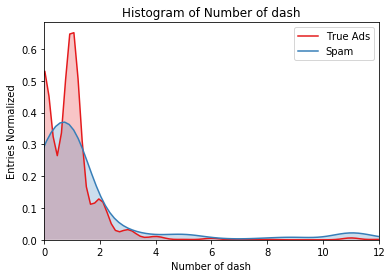

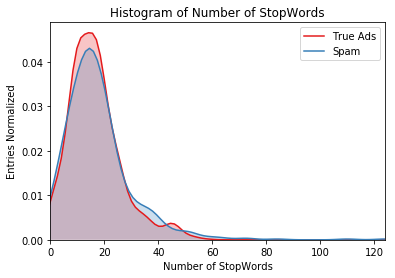

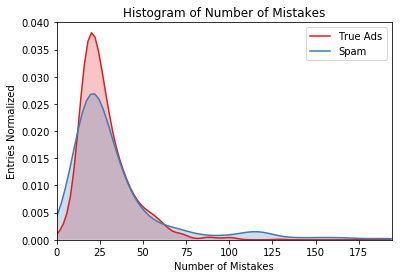

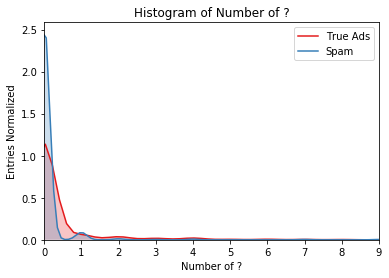

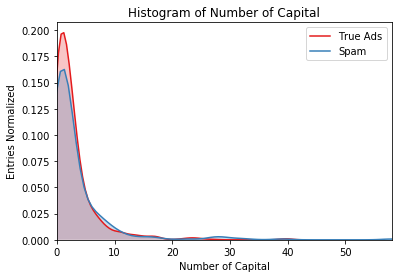

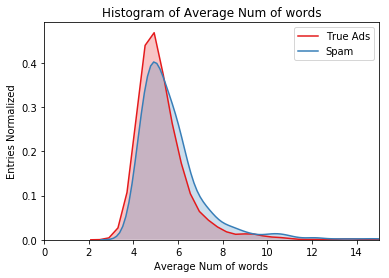

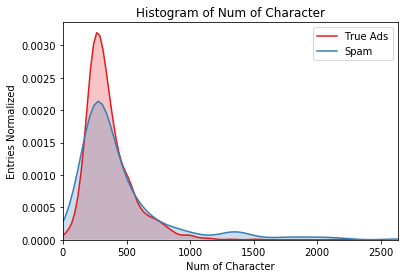

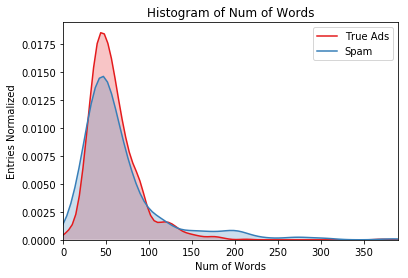

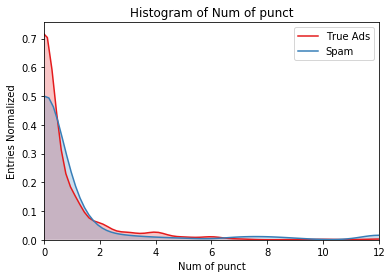

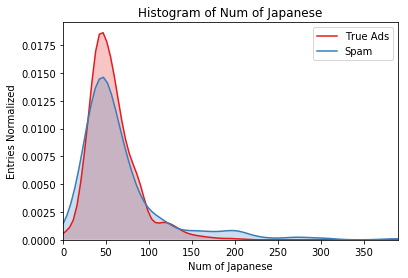

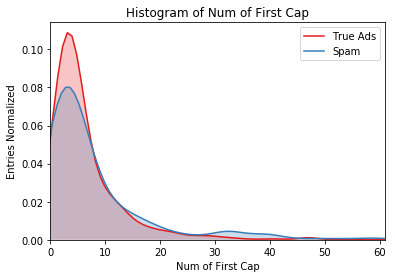

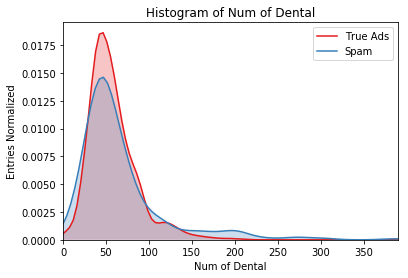

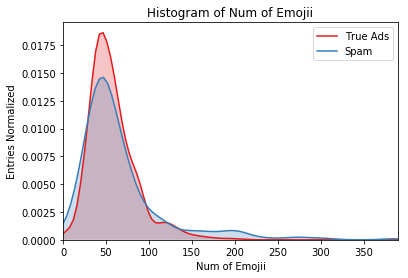

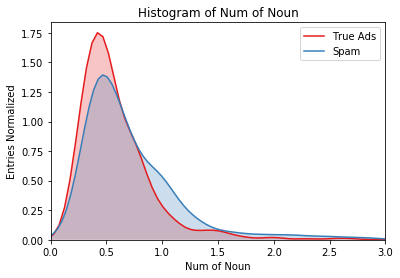

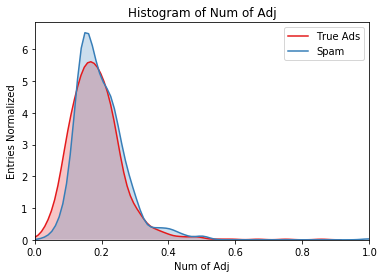

/Users/cristiana/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3152: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0
  'left=%s, right=%s') % (left, right))


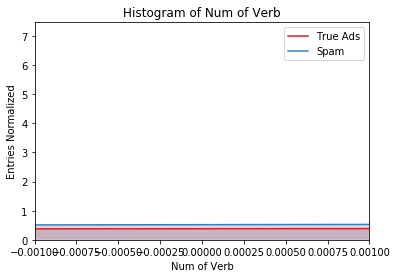

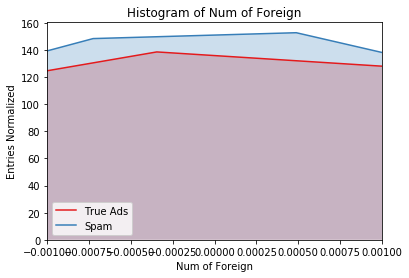

In [43]:
plot_feat_sns(ads_nice['dash'],spam_ads2['dash'],'Number of dash')
plot_feat_sns(ads_nice['stopwords'],spam_ads2['stopwords'],'Number of StopWords')
plot_feat_sns(ads_nice['Nmistakes'],spam_ads2['Nmistakes'],'Number of Mistakes')
plot_feat_sns(ads_nice['questionmark'],spam_ads2['questionmark'],'Number of ?')
plot_feat_sns(ads_nice['upper'],spam_ads2['upper'], 'Number of Capital')
plot_feat_sns(ads_nice['avg_word'],spam_ads2['avg_word'], 'Average Num of words')
plot_feat_sns(ads_nice['char_count'],spam_ads2['char_count'],'Num of Character')
plot_feat_sns(ads_nice['word_count'],spam_ads2['word_count'], 'Num of Words')
plot_feat_sns(ads_nice['Punctuation'],spam_ads2['Punctuation'], 'Num of punct')
plot_feat_sns(ads_nice['unicode_japanese'],spam_ads2['unicode_japanese'], 'Num of Japanese')
plot_feat_sns(ads_nice['NumOfCapital'],spam_ads2['NumOfCapital'], 'Num of First Cap')
plot_feat_sns(ads_nice['unicode_re'],spam_ads2['unicode_re'], 'Num of Dental')
plot_feat_sns(ads_nice['Emojii'],spam_ads2['Emojii'], 'Num of Emojii')
plot_feat_sns(ads_nice['N_noun'],spam_ads2['N_noun'], 'Num of Noun')
plot_feat_sns(ads_nice['N_adj'],spam_ads2['N_adj'], 'Num of Adj')
plot_feat_sns(ads_nice['N_verb'],spam_ads2['N_verb'],'Num of Verb')
plot_feat_sns(ads_nice['N_foreign'],spam_ads2['N_foreign'],'Num of Foreign')

# More text exploration

## Is there a phone number?

In [219]:
spam_ads2['Phone'] = spam_ads2['Text'].str.extract('(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4}[-\.\s]??\d{3}|\d{3}[-\.\s]??\d{4})')
ads_nice['Phone']  = ads_nice['Text'].str.extract('(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4}[-\.\s]??\d{3}|\d{3}[-\.\s]??\d{4})')
#df_alltext_numbersonly = df_alltext.body.str.extract('(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4}[-\.\s]??\d{3}|\d{3}[-\.\s]??\d{4})')

<>:1: DeprecationWarning: invalid escape sequence \d
<>:2: DeprecationWarning: invalid escape sequence \d
<>:1: DeprecationWarning: invalid escape sequence \d
<>:2: DeprecationWarning: invalid escape sequence \d
<>:1: DeprecationWarning: invalid escape sequence \d
<>:2: DeprecationWarning: invalid escape sequence \d
<ipython-input-219-030cc623ae3d>:1: DeprecationWarning: invalid escape sequence \d
  spam_ads2['Phone'] = spam_ads2['Text'].str.extract('(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4}[-\.\s]??\d{3}|\d{3}[-\.\s]??\d{4})')
<ipython-input-219-030cc623ae3d>:2: DeprecationWarning: invalid escape sequence \d
  ads_nice['Phone']  = ads_nice['Text'].str.extract('(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4}[-\.\s]??\d{3}|\d{3}[-\.\s]??\d{4})')


## How many nan or phone? 

In [220]:
spam_ads2['Phone_01'] = spam_ads2['Phone'].notnull().astype(int)
ads_nice['Phone_01'] = ads_nice['Phone'].notnull().astype(int)

In [221]:
spam_ads2['Phone_01'].value_counts()

1    618
0    58 
Name: Phone_01, dtype: int64

In [222]:
ads_nice['Phone_01'].value_counts()

1    1115
0    64  
Name: Phone_01, dtype: int64

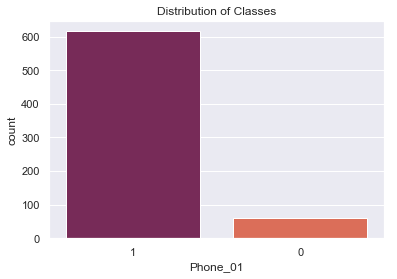

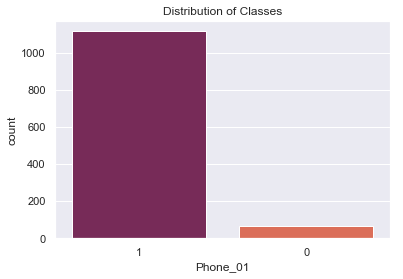

In [127]:
plot_count('Phone_01',spam_ads2)
plot_count('Phone_01',ads_nice)

## Does the phone has punctuation?

## Is there an email?

In [223]:
spam_ads2['Email'] = spam_ads2.Text.str.extract('([a-zA-Z0-9-_.]+@[a-zA-Z0-9-_.]+|\w+@\w+)')
ads_nice['Email']  = ads_nice.Text.str.extract('([a-zA-Z0-9-_.]+@[a-zA-Z0-9-_.]+ |\w+@\w+)')

<>:1: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<>:1: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<>:1: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<ipython-input-223-2e334040712e>:1: DeprecationWarning: invalid escape sequence \w
  spam_ads2['Email'] = spam_ads2.Text.str.extract('([a-zA-Z0-9-_.]+@[a-zA-Z0-9-_.]+|\w+@\w+)')
<ipython-input-223-2e334040712e>:2: DeprecationWarning: invalid escape sequence \w
  ads_nice['Email']  = ads_nice.Text.str.extract('([a-zA-Z0-9-_.]+@[a-zA-Z0-9-_.]+ |\w+@\w+)')


In [224]:
spam_ads2['Email_01'] = spam_ads2['Email'].notnull().astype(int)
ads_nice['Email_01'] = ads_nice['Email'].notnull().astype(int)

In [225]:
spam_ads2['Email_01'].value_counts()

0    676
Name: Email_01, dtype: int64

In [226]:
ads_nice['Email_01'].value_counts()

0    1176
1    3   
Name: Email_01, dtype: int64

# 3. Cleaning the text

In [237]:
import unicodedata
spam_ads2['str'] = spam_ads2['Text'].apply(lambda x: (unicodedata.normalize(u'NFKD', x).encode('ascii', 'ignore').decode('utf8')) )
ads_nice['str'] = ads_nice['Text'].apply(lambda x: (unicodedata.normalize(u'NFKD', x).encode('ascii', 'ignore').decode('utf8')) )


## 3.1 Lower words

In [248]:
ads_nice['ads_lower'] = ads_nice['str'].apply(lambda x: " ".join(x.lower() for x in x.split()))
spam_ads2['ads_lower'] =spam_ads2['str'].apply(lambda x: " ".join(x.lower() for x in x.split()))


## 3.2 emojii and character in one column

In [239]:
emoji_re = re.compile('[\\u203C-\\u3299\\U0001F000-\\U0001F644]')

ads_nice['Emojii_col'] = ads_nice['ads_lower'].apply(lambda x: emoji_re.findall(x))
spam_ads2['Emojii_col'] =spam_ads2['ads_lower'].apply(lambda x: emoji_re.findall(x))


In [240]:
unicode_re = re.compile('[\xF0\x9F\x98\xA2]',re.IGNORECASE)
ads_nice['Unicode_col'] = ads_nice['Text'].apply(lambda x: unicode_re.findall(x))
spam_ads2['Unicode_col'] =spam_ads2['Text'].apply(lambda x: unicode_re.findall(x))


In [241]:
print('[\u00F0\u00F5]')

[ðõ]


In [242]:
unicode_ar = re.compile('[[\u00F0\u00F9][\u00A0\u00A9][\u00C0\u00C9]]',re.IGNORECASE)

ads_nice['Unicode_col'] = ads_nice['Text'].apply(lambda x: unicode_ar.findall(x))
spam_ads2['Unicode_col'] =spam_ads2['Text'].apply(lambda x: unicode_ar.findall(x))

## 3.3 Some extra website cleaning

In [249]:
ads_nice['ads_clean_wont'] = ads_nice['ads_lower'].apply(lambda x: x.replace("wont"," won't "))
spam_ads2['ads_clean_wont'] = spam_ads2['ads_lower'].apply(lambda x: x.replace("wont"," won't "))

In [250]:
ads_nice['ads_clean_im'] = ads_nice['ads_clean_wont'].apply(lambda x: x.replace("im"," i'm "))
spam_ads2['ads_clean_im'] = spam_ads2['ads_clean_wont'].apply(lambda x: x.replace("im"," i'm "))

In [252]:
ads_nice['ads_clean_n'] = ads_nice['ads_clean_im'].apply(lambda x: x.replace(r"\n"," "))
spam_ads2['ads_clean_n'] = spam_ads2['ads_clean_im'].apply(lambda x: x.replace(r"\n"," "))

In [288]:
ads_nice['ads_clean_xa0'] = ads_nice['ads_clean_n'].apply(lambda x: x.replace(r"\xa0"," "))
spam_ads2['ads_clean_xa0'] = spam_ads2['ads_clean_n'].apply(lambda x: x.replace(r"\xa0"," "))

In [289]:
ads_nice['ads_clean_x9f'] = ads_nice['ads_clean_xa0'].apply(lambda x: x.replace(r"\x9f"," "))
spam_ads2['ads_clean_x9f'] = spam_ads2['ads_clean_xa0'].apply(lambda x: x.replace(r"\x9f"," "))

In [302]:
ads_nice['ads_clean_x'] = ads_nice['ads_clean_x9f'].apply(lambda x: x.replace(r"\x"," "))
spam_ads2['ads_clean_x'] = spam_ads2['ads_clean_x9f'].apply(lambda x: x.replace(r"\x"," "))

In [303]:
remove_web = re.compile(r'[^\x00-\x9c]')
ads_nice['ads_clean_web'] = ads_nice['ads_clean_x'].apply(lambda x: remove_web.sub(" ",x) )
spam_ads2['ads_clean_web'] =spam_ads2['ads_clean_x'].apply(lambda x: remove_web.sub(" ",x) )

## 3.4  Change all the words that mean number in words and check if there are phone numbers, remove the res

In [304]:
#remove web stuff
remove_pun = re.compile("<[^>]+>",re.IGNORECASE)

ads_nice['ads_clean_web2'] = ads_nice['ads_clean_web'].apply(lambda x: remove_pun.sub("",x) )
spam_ads2['ads_clean_web2'] =spam_ads2['ads_clean_web'].apply(lambda x: remove_pun.sub("",x) )

In [321]:
#remove digits
remove_pun = re.compile(r"[0-9().,\-!?@&:$;*/\[\]\%'\`\"\_\n\\\<\>]+",re.IGNORECASE)

ads_nice['ads_clean_nocontr_punt'] = ads_nice['ads_clean_web2'].apply(lambda x: remove_pun.sub(" ",x) )
spam_ads2['ads_clean_nocontr_punt'] =spam_ads2['ads_clean_web2'].apply(lambda x: remove_pun.sub(" ",x) )

In [322]:
# Remove emojii only from one and use two column
unicode_ar = re.compile(r'[[\u00F0\u00F9][\u00A0\u00A9][\u00C0\u00C9]]+',re.IGNORECASE)
ads_nice['Emojii_strip'] = ads_nice['ads_clean_nocontr_punt'].apply(lambda x: emoji_re.sub("",x) )
spam_ads2['Emojii_strip'] =spam_ads2['ads_clean_nocontr_punt'].apply(lambda x: emoji_re.sub("",x) )
ads_nice['Unicode_strip'] = ads_nice['Emojii_strip'].apply(lambda x: unicode_re.sub("",x) )
spam_ads2['Unicode_strip'] =spam_ads2['Emojii_strip'].apply(lambda x: unicode_re.sub("",x) )
ads_nice['Unicode_ar'] = ads_nice['Unicode_strip'].apply(lambda x: unicode_ar.sub("",x) )
spam_ads2['Unicode_ar'] =spam_ads2['Unicode_strip'].apply(lambda x: unicode_ar.sub("",x) )

In [323]:
spam_ads2['Unicode_ar']

0           a        hi my name is mercedes  ia    m   real  ia    m independent  seeking generous gentleman to have a good t i m e with  ia    m offering outcalls and carfun  you must have a car text me now                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

## 3.3.1 Contraction

In [324]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i m": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it d": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [325]:
import re
ps = nltk.PorterStemmer()
#preprocess the dataset
def preprocess_text(text):
    # Convert words to lower case
    text = text.lower()
    # Replace contractions with their longer forms 
    if True:
        # We are not using "text.split()" here
        #since it is not fool proof, e.g. words followed by punctuations "Are you kidding?I think you aren't."
        text = re.findall(r"[\w']+", text)
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    
   

    return text
       
#clean_data = sample_data.copy()  

ads_nice['ads_clean_nocontr']= ads_nice['Unicode_ar'].apply(preprocess_text) #lambda x: cut_phone(x) )
spam_ads2['ads_clean_nocontr']=spam_ads2['Unicode_ar'].apply(preprocess_text) #.apply(lambda x: cut_phone(x) )


## 3.3 Regular expression

In [326]:
ads_nice['ads_clean_nocontr_ht'] = ads_nice['ads_clean_nocontr'].str.replace(r"http\S+", " ")
ads_nice['ads_clean_nocontr_htp'] = ads_nice['ads_clean_nocontr_ht'].str.replace(r"http", " ")
ads_nice['ads_clean_nocontr_S'] = ads_nice['ads_clean_nocontr_htp'].str.replace(r"@\S+", " ")

spam_ads2['ads_clean_nocontr_ht'] = spam_ads2['ads_clean_nocontr'].str.replace(r"http\S+", " ")
spam_ads2['ads_clean_nocontr_htp'] = spam_ads2['ads_clean_nocontr_ht'].str.replace(r"http", " ")
spam_ads2['ads_clean_nocontr_S'] = spam_ads2['ads_clean_nocontr_htp'].str.replace(r"@\S+", " ")

## 3.5 Spelling Correction

In [327]:
from textblob import TextBlob
ads_nice['ads_clean_nocontr_spell'] = ads_nice['ads_clean_nocontr_S'].apply(lambda x: str(TextBlob(x).correct()))
spam_ads2['ads_clean_nocontr_spell'] = spam_ads2['ads_clean_nocontr_S'].apply(lambda x: str(TextBlob(x).correct()))

## 3.6 Remove stopword

In [329]:
from nltk.corpus import stopwords
stop = stopwords.words('english')


spam_ads2['ads_clean_nocontr_stopword'] = spam_ads2['ads_clean_nocontr_spell'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
ads_nice['ads_clean_nocontr_stopword'] = ads_nice['ads_clean_nocontr_spell'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

## 3.7 Remove words that come from the ads

In [330]:
ads_words = ['post','ads','united','states','hair', 'home', 'last', 'updated', 'available', 'gmt 8','im','gmt','category','name','location','color','build','height','rate','screening','reviews','updated','atcityxguide','eye','com','washington','seattle','can', 'lets', 'about', 'till',  'get', "let's", 'im', 'tried', 'let', 'know', 'u', 'looks', 'try', 'til', 'text', 'tries',  'ur', 'name', 'must', 'wants', 'hi', "i'm", 'likes','b4', 'hmu', 'ring', 'u', 'c', 'r', 'b', 'n', 'd', 's', 'give']
spam_ads2['ads_clean_nocontr_MoreWord'] = spam_ads2['ads_clean_nocontr_stopword'].apply(lambda x: " ".join(x for x in x.split() if x not in ads_words))
ads_nice['ads_clean_nocontr_MoreWord'] = ads_nice['ads_clean_nocontr_stopword'].apply(lambda x: " ".join(x for x in x.split() if x not in ads_words))

## 3.8 Remove short word

In [331]:
ads_nice['ads_clean_short'] = ads_nice['ads_clean_nocontr_MoreWord'].apply(lambda x: " ".join(x for x in x.split() if len(x) > 2))
spam_ads2['ads_clean_short'] = spam_ads2['ads_clean_nocontr_MoreWord'].apply(lambda x: " ".join(x for x in x.split() if len(x) > 2))



In [332]:
# Why those weird a didn't get elimanetd???
#remove web stuff
why = re.compile("\u00C3",re.IGNORECASE)

ads_nice['ads_clean_why'] = ads_nice['ads_clean_short'].apply(lambda x: why.sub("",x) )
spam_ads2['ads_clean_why'] =spam_ads2['ads_clean_short'].apply(lambda x: why.sub("",x) )

In [333]:
why = re.compile("\u00C2",re.IGNORECASE)

ads_nice['ads_clean_why2'] = ads_nice['ads_clean_why'].apply(lambda x: why.sub("",x) )
spam_ads2['ads_clean_why2'] =spam_ads2['ads_clean_why'].apply(lambda x: why.sub("",x) )

## 3.8 Common word removal

In [339]:
freq1 = pd.Series(' '.join(ads_nice['ads_clean_why2']).split()).value_counts()[:10]
freq1

sex        855
looking    606
fun        435
girl       430
come       406
call       383
want       356
real       329
amp        324
love       300
dtype: int64

In [340]:
freq2 = pd.Series(' '.join(spam_ads2['ads_clean_why2']).split()).value_counts()[:10]
freq2

sex        532
looking    334
hour       301
amp        258
come       250
girl       246
fun        227
want       216
call       210
body       195
dtype: int64

In [341]:
freq1 = list(freq1.index)
ads_nice['ads_clean_freq'] = ads_nice['ads_clean_why2'].apply(lambda x: " ".join(x for x in x.split() if x not in freq1))


In [342]:
freq2 = list(freq2.index)
spam_ads2['ads_clean_freq'] = spam_ads2['ads_clean_why2'].apply(lambda x: " ".join(x for x in x.split() if x not in freq2))



## 3.9 Rare words removal

In [344]:
not_freq = pd.Series(' '.join(ads_nice['ads_clean_freq']).split()).value_counts()[-5:]
not_freq


interest      1
island        1
bondage       1
australian    1
delights      1
dtype: int64

In [227]:
not_freq2 = pd.Series(' '.join(spam_ads2['ads_clean_freq']).split()).value_counts()[-5:]
not_freq2

xfxcxfn                                                                         1
happiest                                                                        1
major                                                                           1
exhaustionnplease                                                               1
sexes                                                                           1
verifiedhey                                                                     1
dandy                                                                           1
attractivexanxa                                                                 1
jack                                                                            1
somexanstress                                                                   1
bones                                                                           1
access                                                                          1
nownthat        

In [ ]:
not_freq = list(not_freq.index)
ads_nice['ads_clean_rare'] = ads_nice['ads_clean_freq'].apply(lambda x: " ".join(x for x in x.split() if x not in not_freq))


In [ ]:
not_freq2 = list(not_freq2.index)
spam_ads2['ads_clean_rare'] = spam_ads2['ads_clean_freq'].apply(lambda x: " ".join(x for x in x.split() if x not in not_freq))



In [345]:
ads_nice.to_pickle('Total_labelPositive_adsTEXT_+_counts_CLEAN_withcommom_feb11.pkl')
ads_nice.to_csv('Total_labelPositive_adsTEXT_+_counts_CLEAN_withcommom_feb11.csv')
spam_ads2.to_pickle('Total_labelSPAM_adsTEXT_+_counts_CLEAN_withcommom_feb11.pkl')
spam_ads2.to_csv('Total_labelSPAM_adsTEXT_+_counts_CLEAN_withcommom_feb11.csv')

In [63]:
ads_nice = pd.read_pickle('Total_labelPositive_adsTEXT_+_counts_CLEAN_withcommom_feb11.pkl')
spam_ads2 =pd.read_pickle('Total_labelSPAM_adsTEXT_+_counts_CLEAN_withcommom_feb11.pkl')

In [64]:
# create the lemmatizer
lemmatizer = WordNetLemmatizer()
#apply lemmatizer 
ads_nice['lemmatize'] = ads_nice['ads_clean_freq'].apply(lemmatizer.lemmatize)
spam_ads2['lemmatize'] = spam_ads2['ads_clean_freq'].apply(lemmatizer.lemmatize)
# create the stem
stemmer = PorterStemmer()
#apply stem
ads_nice['stem'] = ads_nice['lemmatize'].apply(stemmer.stem)
spam_ads2['stem'] = spam_ads2['lemmatize'].apply(stemmer.stem)

In [65]:
from nltk import FreqDist
import nltk

In [66]:
ads_nice['token'] = ads_nice['stem'].apply(lambda x: nltk.word_tokenize(x) )
spam_ads2['token'] = spam_ads2['stem'].apply(lambda x: nltk.word_tokenize(x) )

In [67]:
tokens_all_ads  =ads_nice['token'].tolist()
tokens_all_spam =spam_ads2['token'].tolist()

In [68]:
list_of_word_spam = []
for tok,_ in enumerate(tokens_all_spam):
    m = len(tokens_all_spam[tok])
    for i in range(m):
        word = tokens_all_spam[tok][i]
        list_of_word_spam.append(word)

In [69]:
list_of_word_ads = []
for tok,_ in enumerate(tokens_all_ads):
    m = len(tokens_all_ads[tok])
    for i in range(m):
        word = tokens_all_ads[tok][i]
        list_of_word_ads.append(word)

In [70]:
text_spam = str(list_of_word_spam).split()
text_ads  = str(list_of_word_ads).split()

In [71]:
len(text_spam)

17895

In [72]:
len(text_ads)

26456

In [73]:
fdist_spam = FreqDist(text_spam)
fdist_ads = FreqDist(text_ads)

In [74]:
for key,value in fdist_spam.items():
    fdist_spam[key] = value/17895

In [75]:
for key,value in fdist_ads.items():
    fdist_ads[key] = value/26456

In [76]:
top_50_spam, _ = zip(*fdist_spam.most_common(100))
top_50_ads, _ = zip(*fdist_ads.most_common(100))

In [77]:
tot_double = [x for x in top_50_spam if x in top_50_ads] 
not_double = [x for x in top_50_spam if x not in top_50_ads]

/Users/cristiana/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


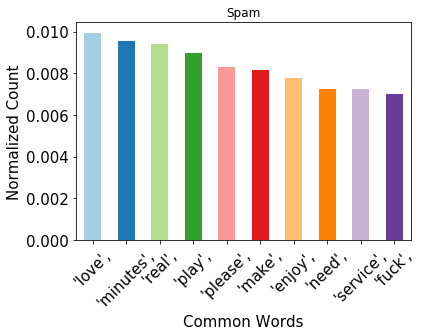

In [78]:
lst = fdist_spam.most_common(int(10))
df1 = pd.DataFrame(lst, columns = ['Word', 'Count'])

df1.plot.bar(x='Word',y='Count',legend=False, color=plt.cm.Paired(np.arange(len(df1))))
plt.title(str('Spam'))
plt.xlabel('Common Words', fontsize=15)
plt.ylabel('Normalized Count', fontsize=15)
plt.xticks(rotation = 45, fontsize=15)
plt.yticks(fontsize=15)

plt.show()

(array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012]),
 <a list of 7 Text yticklabel objects>)

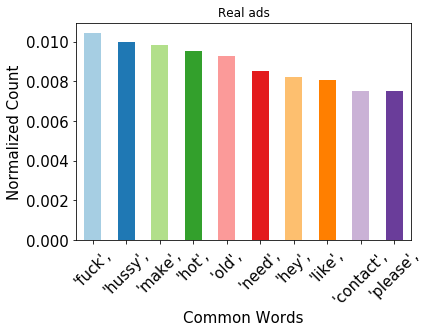

In [79]:
lst = fdist_ads.most_common(int(10))
df2 = pd.DataFrame(lst, columns = ['Word', 'Count'])
df2.plot.bar(x='Word',y='Count',legend=False, color=plt.cm.Paired(np.arange(len(df2))))
plt.title(str('Real ads'))
plt.xlabel('Common Words', fontsize=15)
plt.ylabel('Normalized Count', fontsize=15)
plt.xticks(rotation = 45, fontsize=15)
plt.yticks(fontsize=15)

In [80]:
new_dic_spam = fdist_spam.copy()
new_dic_ads = fdist_ads.copy()

In [81]:
for key1,value1 in fdist_ads.items():
    if key1 in fdist_spam.keys():
        value2 = fdist_spam[key1]
        if (value1 > value2) :
            new_dic_ads[key1] = (value1 - value2)
            del new_dic_spam[key1]
        else:
            new_dic_spam[key1] = (value2 - value1)
            del new_dic_ads[key1]

In [82]:
len(new_dic_spam)

1419

In [83]:
len(fdist_spam)

2065

In [84]:
len(new_dic_ads)

1727

In [85]:
len(fdist_ads)

2464

(array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012]),
 <a list of 7 Text yticklabel objects>)

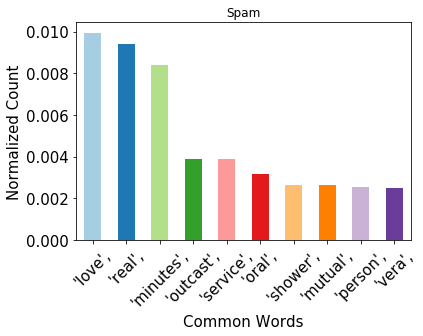

In [86]:
lst = new_dic_spam.most_common(int(10))
df3 = pd.DataFrame(lst, columns = ['Word', 'Count'])
df3.plot.bar(x='Word',y='Count',legend=False, color=plt.cm.Paired(np.arange(len(df1))))
plt.title(str('Spam'))
plt.xlabel('Common Words', fontsize=15)
plt.ylabel('Normalized Count', fontsize=15)
plt.xticks(rotation = 45, fontsize=15)
plt.yticks(fontsize=15)

(array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008]),
 <a list of 9 Text yticklabel objects>)

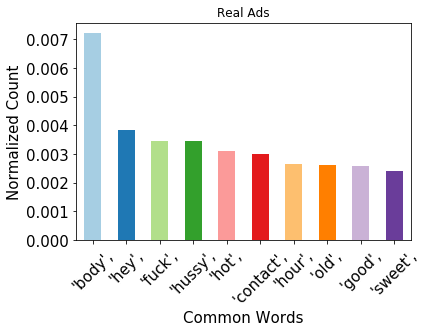

In [87]:
from matplotlib import rcParams
rcParams['font.sans-serif'] = 'Computer Modern Sans Serif'

lst = new_dic_ads.most_common(int(10))
df4 = pd.DataFrame(lst, columns = ['Word', 'Count'])
df4.plot.bar(x='Word',y='Count',legend=False, color=plt.cm.Paired(np.arange(len(df4))))
plt.title(str('Real Ads'))
plt.xlabel('Common Words', fontsize=15)
plt.ylabel('Normalized Count', fontsize=15)
plt.xticks(rotation = 45, fontsize=15)
plt.yticks(fontsize=15)

#ax.tick_params(labelsize=15)

In [88]:
# create a list with the new words
list_new_words_ads = list(new_dic_ads.keys())
list_new_words_spam = list(new_dic_spam.keys())

In [89]:
spam_ads2['Last_freq'] = spam_ads2['stem'].apply(lambda x: " ".join(x for x in x.split() if x not in list_new_words_ads))
ads_nice['Last_freq']  = ads_nice['stem'].apply(lambda x: " ".join(x for x in x.split() if x not in list_new_words_spam))

In [90]:
import gensim # this is bad, but I am tired and lacking of time
import re
import spacy, nltk
import pandas as pd
import numpy as np
import xgboost as xgb
from collections import Counter
from nltk import word_tokenize, pos_tag
from nltk.probability import FreqDist
from nltk.corpus import wordnet
import gensim.corpora as corpora
# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [125]:
#Create the Document-Word matrix using CountVectorizer
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=5,                        # minimum reqd occurences of a word 
                             token_pattern='[a-zA-Z0-9]{2,}',  # num chars > 2
                             # max_features=50000,             # max number of uniq words
                            )
#fit_transform to actually create the matrix
data_vectorized = vectorizer.fit_transform(ads_nice['Last_freq'])
data_vectorized

<1179x836 sparse matrix of type '<class 'numpy.int64'>'
	with 21977 stored elements in Compressed Sparse Row format>

In [135]:
lda_model = LatentDirichletAllocation(n_components=5,               # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)  # Model attributes

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=5, n_jobs=-1, n_topics=None, perp_tol=0.1,
             random_state=100, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)


In [136]:

X_topics = lda_model.fit_transform(data_vectorized)
topic_word = lda_model.components_ 
vocab = vectorizer.get_feature_names()
# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))
print(topic_summaries)

['best make friendly open happy service minded body natural independent', 'hot enjoy body face definitely pretty years hour old guy', 'yes car live interest enjoy alone really anywhere house drive', 'sweet always ready nice gentlemen eyes beautiful exotic independent pick', 'fuck hussy need old make man someone horny guy host']


In [140]:
from sklearn.manifold import TSNE

# a t-SNE model
# angle value close to 1 means sacrificing accuracy for speed
# pca initializtion usually leads to better results 
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')

# 20-D -> 2-D
tsne_lda = tsne_model.fit_transform(X_topics)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1179 samples in 0.009s...
[t-SNE] Computed neighbors for 1179 samples in 0.034s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1179
[t-SNE] Computed conditional probabilities for sample 1179 / 1179
[t-SNE] Mean sigma: 0.005977
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.261429
[t-SNE] KL divergence after 1000 iterations: 0.296011


In [144]:
import numpy as np
import bokeh.plotting as bp
from bokeh.plotting import save
from bokeh.models import HoverTool

n_top_words = 5 # number of keywords we show

# 20 colors
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5"
])

In [149]:
topic_summaries = []
topic_word = topic_keywords  # all topic words
vocab = vectorizer.get_feature_names()
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words + 1):-1] # get!
    topic_summaries.append(' '.join(topic_words)) # append!

In [162]:
title = '20 newsgroups LDA viz'
num_example = len(X_topics)

plot_lda = bp.figure(plot_width=1400, plot_height=1100,
                     title=title,
                     tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
                     x_axis_type=None, y_axis_type=None, min_border=1)

plot_lda.scatter(x=tsne_lda[:, 0], y=tsne_lda[:, 1],source=bp.ColumnDataSource({
                   "content": ads_nice[:num_example],
                   "topic_key": _lda_keys[:num_example]
                   }))


RuntimeError: 

Expected x and y to reference fields in the supplied data source.

When a 'source' argument is passed to a glyph method, values that are sequences
(like lists or arrays) must come from references to data columns in the source.

For instance, as an example:

    source = ColumnDataSource(data=dict(x=a_list, y=an_array))

    p.circle(x='x', y='y', source=source, ...) # pass column names and a source

Alternatively, *all* data sequences may be provided as literals as long as a
source is *not* provided:

    p.circle(x=a_list, y=an_array, ...)  # pass actual sequences and no source



In [160]:
# randomly choose a news (within a topic) coordinate as the crucial words coordinate
topic_coord = np.empty((X_topics.shape[1], 2)) * np.nan
for topic_num in _lda_keys:
    if not np.isnan(topic_coord).any():
        break
    topic_coord[topic_num] = tsne_lda[_lda_keys.index(topic_num)]

# plot crucial words
for i in range(X_topics.shape[1]):
      plot_lda.text(topic_coord[i, 0], topic_coord[i, 1], [topic_summaries[i]])

# hover tools
hover = plot_lda.select(dict(type=HoverTool))
hover.tooltips = {"content": "@content - topic: @topic_key"}


In [165]:
topic_keywords = []
keywords = np.array(vectorizer.get_feature_names())
for topic_weights in lda_model.components_:
    top_keyword_locs = (-topic_weights).argsort()[:]
    topic_keywords.append(keywords.take(top_keyword_locs))

In [167]:
len(topic_keywords)

5

In [137]:
topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
#df_topic_keywords.index = [str(i) for i in ]
#df_topic_keywords.reset_index(inplace=True)
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
0,best,make,friendly,open,happy,service,minded,body,natural,independent,discreet,massage,guns,naughty,hey
1,hot,enjoy,body,face,definitely,pretty,years,hour,old,guy,beautiful,also,boots,loves,experience
2,yes,car,live,interest,enjoy,alone,really,anywhere,house,drive,meet,def,bored,public,sexual
3,sweet,always,ready,nice,gentlemen,eyes,beautiful,exotic,independent,pick,pleasure,discreet,body,take,serious
4,fuck,hussy,need,old,make,man,someone,horny,guy,host,play,please,meet,hey,contact


In [103]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    '''
    vectorizer = vectorizer chosen
    lda model
    nwords
    '''
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

In [114]:
def predict_topic(text):

    # Vectorize transform
    mytext_2 = vectorizer.transform(text)

    # LDA Transform
    topic_probability_scores =lda_model.transform(mytext_2)
    topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), :].values.tolist()
    return topic, topic_probability_scores

In [129]:
data_vectorized2 = vectorizer.transform(spam_ads2['Last_freq'])

In [123]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()


In [130]:
print_top_words(lda_model, vectorizer.get_feature_names(), 10)

Topic #0: make contact old minded open please age years horny free
Topic #1: men calls blocked talk bust explicit scale nice black true
Topic #2: ano past boy con halo french rock accept quick sin
Topic #3: ready man fuck hussy hot guns need suck years eat
Topic #4: like alone house enjoy hussy live old def money hot
Topic #5: good fuck make someone age baby happy please feel suck
Topic #6: eyes area beautiful les like comfortable gentleman bony nice hello
Topic #7: make need lonely fast serious interested night guns play special
Topic #8: meet fuck yes sexual car really muddy prefer drive bored
Topic #9: man unhappy host vessel place yes alone oral hook fuck
Topic #10: woman man nice life like nothing old year right need
Topic #11: tell student hey getting fantasies busy naked mine fucking honest
Topic #12: hey good one anna play please host woman days hit
Topic #13: sweet best long needs please independent every miss black work
Topic #14: blonde sure enjoy outdoor slender dirty found

In [139]:
# super cool pyLDAvis
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')
panel2 = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')
panel

/Users/cristiana/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      4.587942   -108.867485  1       1        32.822265
1      113.375641 -39.514282   2       1        25.790447
0      121.749901 -109.474434  3       1        19.248728
3      64.483086  -145.975739  4       1        17.781315
2      47.232010  -55.759628   5       1        4.357246 , topic_info=     Category        Freq          Term       Total  loglift  logprob
term                                                                 
352   Default  259.000000  hot           259.000000  30.0000  30.0000
833   Default  75.000000   yes           75.000000   29.0000  29.0000
219   Default  140.000000  enjoy         140.000000  28.0000  28.0000
292   Default  153.000000  fuck          153.000000  27.0000  27.0000
370   Default  79.000000   interest      79.000000   26.0000  26.0000
65    Default  76.000000   best          76.000000   25.0000  25.0000
447   Default  106.000000  meet          106.000000  24.0000  24.0000
16    Default  56.000000   alone         56.000000   23.0000  23.0000
595   Default  53.000000   really        53.000000   22.0000  22.0000
356   Default  49.000000   house         49.000000   21.0000  21.0000
415   Default  28.000000   live          28.000000   20.0000  20.0000
171   Default  35.000000   def           35.000000   19.0000  19.0000
505   Default  154.000000  old           154.000000  18.0000  18.0000
432   Default  149.000000  make          149.000000  17.0000  17.0000
686   Default  85.000000   someone       85.000000   16.0000  16.0000
82    Default  29.000000   bored         29.000000   15.0000  15.0000
107   Default  22.000000   car           22.000000   14.0000  14.0000
31    Default  27.000000   anywhere      27.000000   13.0000  13.0000
351   Default  69.000000   host          69.000000   12.0000  12.0000
467   Default  26.000000   money         26.000000   11.0000  11.0000
409   Default  126.000000  like          126.000000  10.0000  10.0000
290   Default  55.000000   friendly      55.000000   9.0000   9.0000 
248   Default  61.000000   face          61.000000   8.0000   8.0000 
654   Default  22.000000   sexual        22.000000   7.0000   7.0000 
365   Default  58.000000   independent   58.000000   6.0000   6.0000 
273   Default  24.000000   first         24.000000   5.0000   5.0000 
338   Default  118.000000  hey           118.000000  4.0000   4.0000 
649   Default  68.000000   service       68.000000   3.0000   3.0000 
321   Default  112.000000  guy           112.000000  2.0000   2.0000 
59    Default  71.000000   beautiful     71.000000   1.0000   1.0000 
...       ...         ...  ...                  ...     ...      ... 
619   Topic5   2.061039    roses         2.606445    2.8986  -5.7315 
4     Topic5   1.973678    activities    2.513623    2.8915  -5.7748 
366   Topic5   1.973114    indoor        2.514113    2.8910  -5.7751 
726   Topic5   1.831841    tantalizing   2.375438    2.8735  -5.8494 
725   Topic5   1.998711    tall          2.601154    2.8699  -5.7622 
665   Topic5   1.784264    sin           2.325403    2.8684  -5.8757 
415   Topic5   19.650975   live          28.724532   2.7537  -3.4766 
475   Topic5   11.075369   muddy         16.770383   2.7184  -4.0500 
568   Topic5   10.595078   prefer        17.793903   2.6149  -4.0943 
31    Topic5   14.202462   anywhere      27.091870   2.4875  -3.8013 
654   Topic5   11.797953   sexual        22.645948   2.4813  -3.9868 
764   Topic5   8.941554    travel        16.950005   2.4938  -4.2640 
630   Topic5   11.261313   satisfaction  23.677353   2.3902  -4.0333 
273   Topic5   11.319229   first         24.285591   2.3699  -4.0282 
833   Topic5   26.169445   yes           75.640846   2.0719  -3.1901 
82    Topic5   12.255303   bored         29.184001   2.2657  -3.9487 
467   Topic5   11.167641   money         26.787639   2.2584  -4.0417 
171   Topic5   12.597225   def           35.887554 